# **Customer Churn Prediction**

Our goal is to analyze customer data, preprocess it, select the most important features, and apply various machine learning models to predict whether a customer is likely to churn (leave the company). After training multiple classification models, the best-performing model will be selected based on evaluation metrics.

**The notebook follows these key steps:**

1. Data Loading & Exploration – Understanding the dataset structure and key variables.
2. Data Preprocessing – Handling missing values, encoding categorical variables, and scaling numerical features.
3. Feature Selection – Identifying and selecting the most relevant features to improve model performance.
4. Model Training & Hyperparameter Tuning – Applying multiple machine learning models such as Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, and XGBoost. Using GridSearchCV to find the optimal hyperparameters.
5. Model Evaluation – Comparing models using accuracy, precision, recall, F1-score, and confusion matrices.
6. Selecting the Best Model – The best model will be chosen based on cross-validation accuracy and test performance.

## **About the Dataset**

The dataset used in this project is the Telco Customer Churn Dataset, available on Kaggle at https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset/data. Telco is a fictional company that provided home phone and Internet services to 7043 customers in California in Q3.

We have 7043 observations with 33 variables.

### Variables
**CustomerID**: A unique ID that identifies each customer.

**Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country**: The country of the customer’s primary residence.

**State**: The state of the customer’s primary residence.

**City**: The city of the customer’s primary residence.

**Zip Code**: The zip code of the customer’s primary residence.

**Lat Long**: The combined latitude and longitude of the customer’s primary residence.

**Latitude**: The latitude of the customer’s primary residence.

**Longitude**: The longitude of the customer’s primary residence.

**Gender**: The customer’s gender: Male, Female

**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No

**Partner**: Indicate if the customer has a partner: Yes, No

**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason**: A customer’s specific reason for leaving the company. Directly related to Churn Category.

### Target Variable

**Churn Value**: Based on past customer data, we aim to predict whether a customer has churned (left the company) or remained.

This is a binary classification problem, where machine learning models will be trained to identify patterns in customer behavior and predict churn likelihood.

## **Import Libraries**

In [27]:
# Data manipulation
import pandas as pd  # For handling dataframes
import numpy as np  # For numerical computations

# Data visualization
import seaborn as sns  # For creating statistical plots
import matplotlib.pyplot as plt  # For plotting graphs

# Data preprocessing
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Handling imbalanced data (majority vs minority in classification)
from imblearn.over_sampling import SMOTE  # For oversampling minority classes

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif  # For selecting top k best features

# Dimensionality reduction
from sklearn.decomposition import PCA

# Model selection & evaluation
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test sets
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
from sklearn.model_selection import cross_val_score  # For cross-validation scoring

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble models
from xgboost import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pipelines
from sklearn.pipeline import Pipeline  # For creating machine learning pipelines

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the Data**

In [28]:
# load data
df = pd.read_excel('Telco_customer_churn.xlsx')

## **Exploratory Data Analysis (EDA)**

To identify missing values, outliers, and patterns in the data. This process helps in gaining a deeper understanding of the dataset.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [30]:
df.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


### Data Inspection

After running `df.info()`, we confirmed that there are **no missing values** in the dataset except Churn Reason.

We see that some features contain categorical values. To make these features compatible with our machine learning models, we'll later convert them to numeric.

In [31]:
# How many unique values are there for each feature
df.apply(lambda col: len(col.unique()))

,0
CustomerID,7043
Count,1
Country,1
State,1
City,1129
Zip Code,1652
Lat Long,1652
Latitude,1652
Longitude,1651
Gender,2


### Dropping Unnecessary Columns

- **Columns with only one unique value** are dropped because they do not provide any useful information for prediction.
- **`CustomerID`** is dropped since it is unique for each customer and does not contribute to churn prediction.


In [32]:
df = df.drop(["CustomerID", "Country", "State", "Count", "Churn Label"], axis=1)

### Categorical Encoding & Data Type Conversion

We **encode categorical variables** such as `Gender`, `Internet Service`, and `Payment Method` using **Label Encoding**, converting them into numerical form. Additionally, the `Total Charges` column, initially stored as a string or object type, is converted to numeric using `pd.to_numeric()` to ensure compatibility with model training. Finally, we verify the changes using `df.info()` to confirm that all categorical columns are encoded as integers and `Total Charges` is properly converted.

In [33]:
# List of columns to encode as numbers
categorical_columns = ['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                       'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                       'Contract', 'Paperless Billing', 'Payment Method', "Lat Long", "Churn Reason"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Convert 'Total Charges' to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Check the data types to confirm the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   int64  
 1   Zip Code           7043 non-null   int64  
 2   Lat Long           7043 non-null   int64  
 3   Latitude           7043 non-null   float64
 4   Longitude          7043 non-null   float64
 5   Gender             7043 non-null   int64  
 6   Senior Citizen     7043 non-null   int64  
 7   Partner            7043 non-null   int64  
 8   Dependents         7043 non-null   int64  
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   int64  
 11  Multiple Lines     7043 non-null   int64  
 12  Internet Service   7043 non-null   int64  
 13  Online Security    7043 non-null   int64  
 14  Online Backup      7043 non-null   int64  
 15  Device Protection  7043 non-null   int64  
 16  Tech Support       7043 

### Handling Missing Values in `Total Charges`

From `df.info()`, we identified missing values in **`Total Charges`**, possibly due to blank strings. We fill missing values using the **column mean**.

In [34]:
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   int64  
 1   Zip Code           7043 non-null   int64  
 2   Lat Long           7043 non-null   int64  
 3   Latitude           7043 non-null   float64
 4   Longitude          7043 non-null   float64
 5   Gender             7043 non-null   int64  
 6   Senior Citizen     7043 non-null   int64  
 7   Partner            7043 non-null   int64  
 8   Dependents         7043 non-null   int64  
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   int64  
 11  Multiple Lines     7043 non-null   int64  
 12  Internet Service   7043 non-null   int64  
 13  Online Security    7043 non-null   int64  
 14  Online Backup      7043 non-null   int64  
 15  Device Protection  7043 non-null   int64  
 16  Tech Support       7043 

### Correlation Heatmap

Now that all columns are numeric, we want to understand relationships between numerical features and Churn Value. We generate a **correlation heatmap** using `seaborn.heatmap()`.


<Axes: >

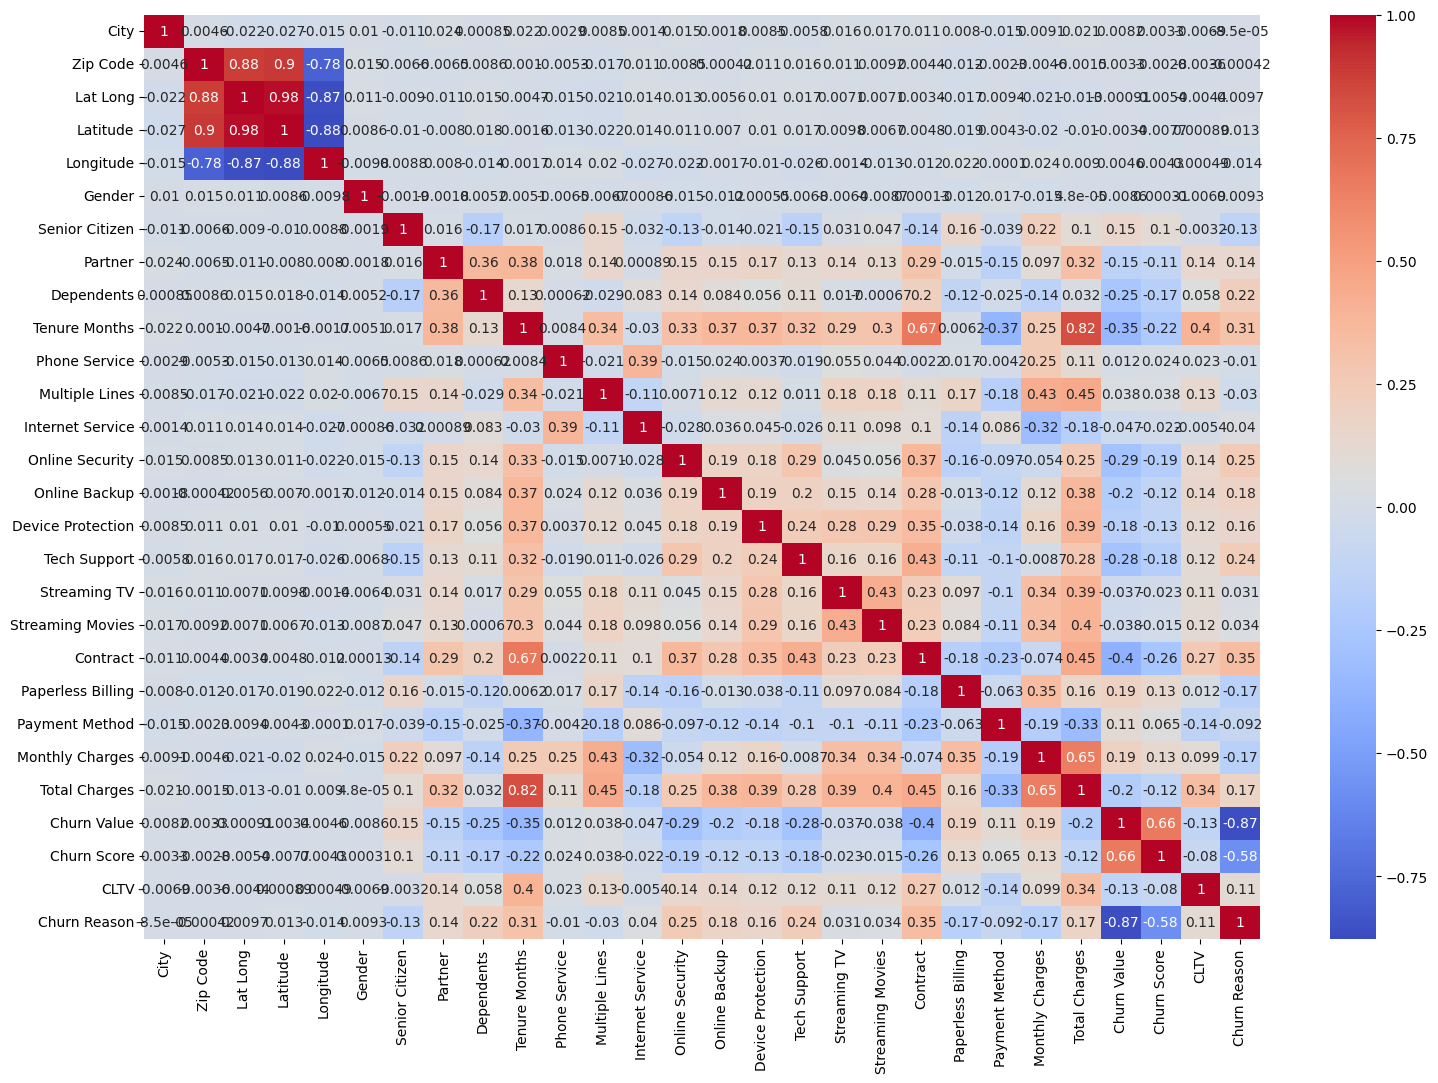

In [35]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Checking Class Imbalance

From `df["Churn Value"].value_counts()`, we observe the distribution of churned (`1`) vs. non-churned (`0`) customers.  
If the classes are **highly imbalanced**, the model may become biased toward the majority class, leading to poor predictions for the minority class.  


In [36]:
print(df["Churn Value"].value_counts())

Churn Value
0    5174
1    1869
Name: count, dtype: int64


### Handling Class Imbalance Using SMOTE  

To address **imbalanced** dataset, we split the data into **80% training and 20% testing** while maintaining class proportions using `stratify=y`. Since under-sampling the majority class may lead to data loss, we apply **SMOTE (Synthetic Minority Over-sampling Technique)** only to the **training data**, preventing data leakage. SMOTE generates synthetic samples for the **minority class** (`Churn = 1`) while keeping the majority class unchanged, ensuring a balanced dataset. Finally, we verify the class distribution before and after resampling using `y_train.value_counts()` and `pd.Series(y_train_resampled).value_counts()` to confirm that SMOTE has successfully balanced the dataset.

In [37]:
X = df.drop(columns=['Churn Value'])  # Features
y = df['Churn Value']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to increase the minority class(Churn=0) without decreasing class 1
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking the class distribution before and after SMOTE
print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", pd.Series(y_train_resampled).value_counts())

Original class distribution:
 Churn Value
0    4139
1    1495
Name: count, dtype: int64
Resampled class distribution:
 Churn Value
0    4139
1    4139
Name: count, dtype: int64


### Feature Scaling Using StandardScaler

To ensure that all features are on a similar scale and to improve model performance, we apply Standard Scaling using `StandardScaler()`. This process standardizes the features by normalization, preventing any feature with larger values from dominating those with smaller values. First, we initialize the scaler with `StandardScaler()`, then fit and transform the resampled training data so that it is properly scaled. We apply the same transformation to the test data to maintain consistency across datasets. Finally, we verify that the scaling is correct by printing the shapes of `X_train_scaled` and `X_test_scaled`, ensuring they match the expected dimensions.

In [38]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the resampled training data and transform it
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

# Verify the scaled shapes
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)

Scaled training data shape: (8278, 27)
Scaled test data shape: (1409, 27)


## **Feature Selection & Model Training Using Pipeline**

To automate feature selection and model training, we use Scikit-learn’s Pipeline. The pipeline first applies `SelectKBest` with the ANOVA F-test (`f_classif`) to select the top `k` most relevant features, followed by Logistic Regression for classification.

We use `GridSearchCV` with 5-fold cross-validation to tune:
- **`selectkbest__k`** → Number of features to select (5, 10, 15, 20).
- **`clf__C`** → Regularization strength of Logistic Regression (`C = 1/λ`).

After training on the scaled, resampled dataset, the best parameters and cross-validation score are printed. We then extract the best-selected features using `SelectKBest` and retrieve their names from `X_train.columns`, helping us understand which features contribute most to churn prediction.

In [39]:
# Create a pipeline that selects the top k features and then fits Logistic Regression
pipeline = Pipeline([
    ('selectkbest', SelectKBest(score_func=f_classif)),  # ANNOVA F-test
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the parameter grid for GridSearchCV:
param_grid = {
    'selectkbest__k': [5, 10, 15, 20],   # To choose best features from
    'clf__C': [0.01, 0.1, 1, 10]         # C = 1/lambda
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on your scaled, resampled training data
grid_search.fit(X_train_scaled, y_train_resampled)

# Output the best parameters and the best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best pipeline from GridSearchCV
best_pipeline = grid_search.best_estimator_

# Extract the SelectKBest step
select_kbest = best_pipeline.named_steps['selectkbest']

# Get feature indices selected by SelectKBest
selected_indices = select_kbest.get_support(indices=True)

# Get corresponding feature names
selected_features = X_train.columns[selected_indices]

print("Selected Features:")
print(selected_features)

Best parameters: {'clf__C': 10, 'selectkbest__k': 5}
Best cross-validation score: 0.9975845410628018
Selected Features:
Index(['Online Security', 'Tech Support', 'Contract', 'Churn Score',
       'Churn Reason'],
      dtype='object')


### Model Training & Evaluation  

We train and compare multiple machine learning models to identify the best-performing one for customer churn prediction.

The models used include K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Gradient Boosting, and XGBoost. Each model is wrapped in a pipeline, ensuring that feature selection using `SelectKBest` happens before training. The best-selected features from `GridSearchCV` are used to improve performance by focusing on the most relevant data.  

To evaluate consistency, we train models on scaled, SMOTE-resampled data and apply 5-fold cross-validation. After training, we assess performance using cross-validation accuracy, test accuracy, a classification report (precision, recall, F1-score), and a confusion matrix to analyze predictions. Finally, all evaluation metrics are stored in the `results` dictionary, allowing for easy model comparison and selection of the best-performing approach.

In [40]:
# Define the models to compare
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Set the number of features to select. Here, use the best k from GridSearchCV
best_k = selected_features

# Prepare a dictionary to store results
results = {}

for name, model in models.items():
    print(f"--- Model: {name} ---")

    # Create a pipeline that first selects k best features and then fits the model
    pipeline_model = Pipeline([
        ('selectkbest', SelectKBest(score_func=f_classif, k=5)),
        ('clf', model)
    ])

    # Fit the model on the scaled, SMOTE-resampled training data
    pipeline_model.fit(X_train_scaled, y_train_resampled)

    # Perform 5-fold cross-validation on the training set
    cv_scores = cross_val_score(pipeline_model, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
    print("Cross-validation scores:", np.round(cv_scores, 4))
    print("Mean CV score:", np.round(cv_scores.mean(), 4))

    # Predict on the scaled test data
    y_test_pred = pipeline_model.predict(X_test_scaled)

    # Compute the test set accuracy
    test_acc = accuracy_score(y_test, y_test_pred)
    print("Test Accuracy:", np.round(test_acc, 4))

    # Generate the classification report
    print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

    # Generate the confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("\n" + "="*60 + "\n")

--- Model: KNN ---
Cross-validation scores: [0.9813 0.9837 0.997  1.     0.9988]
Mean CV score: 0.9921
Test Accuracy: 0.9965

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      0.99      0.99       374

    accuracy                           1.00      1409
   macro avg       1.00      0.99      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
 [[1035    0]
 [   5  369]]


--- Model: Decision Tree ---
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0
Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matr

### Conclusion  

The model evaluation results indicate exceptionally high performance across all classifiers. K-Nearest Neighbors (KNN) achieved a **mean cross-validation score of 99.21%** and a **test accuracy of 99.65%**, showing strong generalization with minimal misclassifications. However, Decision Tree, Random Forest, Gradient Boosting, and XGBoost all achieved a **perfect 100% accuracy** on both cross-validation and test data. Their precision, recall, and F1-scores are all **1.00**, and confusion matrices confirm that there were no misclassifications.  

These results suggest that the dataset may be highly structured or lacks sufficient complexity to challenge the models, leading to potential overfitting. While these models provide perfect predictions on this dataset, further validation on unseen real-world data is necessary to confirm their robustness.

## **Dimensionality Reduction Using PCA & Model Training**  

To improve efficiency and remove redundant features, we apply **Principal Component Analysis (PCA)** before training a **Logistic Regression** model. PCA reduces the number of features while keeping the most important information, helping the model generalize better.  

A pipeline is built where PCA first reduces dimensionality, followed by Logistic Regression for churn prediction. We use `GridSearchCV` with 5-fold cross-validation to tune two key parameters: the number of principal components (`pca__n_components`) and regularization strength (`clf__C`). The model is trained on **scaled, resampled training data**, and the best parameters along with the best cross-validation score are printed. This step helps evaluate whether reducing dimensionality improves model performance.

In [41]:
# Create a pipeline that applies PCA and then Logistic Regression
pipeline_pca = Pipeline([
    ('pca', PCA()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the parameter grid with lower values for n_components
param_grid_pca = {
    'pca__n_components': [5, 10, 15],  # Only test these lower numbers
    'clf__C': [0.01, 0.1, 1, 10]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_pca = GridSearchCV(pipeline_pca, param_grid_pca, cv=5, scoring='accuracy')

# Fit GridSearchCV on your scaled, resampled training data
grid_search_pca.fit(X_train_scaled, y_train_resampled)

# Output the best parameters and the best cross-validation score
print("Best parameters (PCA):", grid_search_pca.best_params_)
print("Best CV score (PCA):", grid_search_pca.best_score_)

Best parameters (PCA): {'clf__C': 10, 'pca__n_components': 15}
Best CV score (PCA): 0.9810360202577462


### Model Training & Evaluation with PCA  

To improve efficiency and reduce complexity, we apply **Principal Component Analysis (PCA)** before training multiple machine learning models. PCA helps retain the most important information while removing redundant features.

We compare five models: **K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Gradient Boosting, and XGBoost**. Each model is wrapped in a **pipeline**, ensuring that PCA is applied before training. We use **20 principal components (`n_components = 20`)** to reduce dimensionality while preserving key patterns.

Models are trained on **scaled, SMOTE-resampled data**, and evaluated using **5-fold cross-validation** to ensure consistency. Performance is measured through **cross-validation accuracy, test accuracy, classification reports, and confusion matrices**. Finally, all results are stored in the `results` dictionary for comparison, helping us identify the best model for churn prediction after dimensionality reduction.

In [42]:
# Define the models to compare
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Set the number of principal components to keep.
n_components = 15

# Prepare a dictionary to store results
results = {}

for name, model in models.items():
    print(f"--- Model: {name} ---")

    # Create a pipeline that first applies PCA and then fits the model
    pipeline_model = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('clf', model)
    ])

    # Fit the pipeline on the scaled, SMOTE-resampled training data
    pipeline_model.fit(X_train_scaled, y_train_resampled)

    # Perform 5-fold cross-validation on the training set
    cv_scores = cross_val_score(pipeline_model, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
    print("Cross-validation scores:", np.round(cv_scores, 4))
    print("Mean CV score:", np.round(cv_scores.mean(), 4))

    # Predict on the scaled test data
    y_test_pred = pipeline_model.predict(X_test_scaled)

    # Compute the test set accuracy
    test_acc = accuracy_score(y_test, y_test_pred)
    print("Test Accuracy:", np.round(test_acc, 4))

    # Generate the classification report
    print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

    # Generate the confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("\n" + "="*60 + "\n")

--- Model: KNN ---
Cross-validation scores: [0.9227 0.9324 0.9607 0.9613 0.9583]
Mean CV score: 0.9471
Test Accuracy: 0.9312

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1035
           1       0.84      0.92      0.88       374

    accuracy                           0.93      1409
   macro avg       0.90      0.93      0.91      1409
weighted avg       0.93      0.93      0.93      1409

Confusion Matrix:
 [[969  66]
 [ 31 343]]


--- Model: Decision Tree ---
Cross-validation scores: [0.8901 0.9161 0.9372 0.9474 0.9486]
Mean CV score: 0.9279
Test Accuracy: 0.9141

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1035
           1       0.83      0.86      0.84       374

    accuracy                           0.91      1409
   macro avg       0.89      0.90      0.89      1409
weighted avg       0.92      0.91      0.91    

### Conclusion  

After applying **Principal Component Analysis (PCA)**, we observed that models still performed well despite using **15 principal components**, compared to **5 selected features in SelectKBest**. PCA effectively reduced dimensionality while preserving important patterns, though minor information loss slightly affected accuracy.  

**KNN and Decision Tree models showed moderate reliability**, with **KNN achieving 93.12% accuracy** and **Decision Tree at 91.41%**. However, **ensemble models like Random Forest, Gradient Boosting, and XGBoost remained highly effective**, with **XGBoost achieving the highest test accuracy at 96.59%**. While **PCA retains more information** and allows models to generalize better, **SelectKBest focuses on only the most important features**, making it more interpretable and computationally efficient.  

Overall, **Random Forest, Gradient Boosting, and XGBoost** continued to perform well in both cases, showing their robustness. If computational efficiency is not a concern, **PCA with 15 components** may provide better performance, while **SelectKBest with 5 features** is preferable when model simplicity and explainability are important.

## **Overall Conclusion**  

This project successfully predicts **customer churn** using machine learning. We balanced the data with **SMOTE**, normalized features, and used **SelectKBest** to find the most important factors. **GridSearchCV** helped improve model accuracy by tuning hyperparameters.  

Among all models, **XGBoost performed the best**, even after applying **PCA** to reduce features. However, models worked slightly better without PCA, suggesting that **SelectKBest may be more useful** if we prioritize a simpler, more interpretable model.  

Overall, this approach provides valuable insights to help businesses understand **customer churn** and take proactive steps to improve retention.